# Street canyon example

This example runs a simulation of a street canyon applying two different scattering models on the walls. 

Random-Incidence Scattering Coefficient (RISC) and Bidirectional Scattering Coefficients (BSC) are assessed.

In this example, the models for the corresponding Bidirectional Reflectance Distribution Functions (BRDF) are loaded from local ``.sofa`` files.

*Check example ``****.ipynb`` to generate the BRDF files from their corresponding scattering models.*


In [ ]:
"""Test the radiosity.Radiosity module."""
import pyfar as pf
import sparrowpy as sp
from utils.run_simu import run_simu, run_simu_BRDF
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.fig_formatting import create_fig

%matplotlib inline

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Select origin of scattering data

In [32]:
###################################################
#### SET "True" TO LOAD YOUR OWN GENERATED DATA
#### "False" TO LOAD THE DATA FROM THE PAPER
self_data=False
###################################################

if self_data:
    sub_dir="user"
else:
    sub_dir="paper"

basepath= os.path.join(os.getcwd(),"resources")

We define a function to easily generate the street canyon from 3 dimensions.

In [33]:
def urban_canyon_stub(length_x, length_y, length_z):
    """Create a shoebox room with the given dimensions.

    Parameters
    ----------
    length_x : float
        Length of the urban canyon in meters.
    length_y : float
        width of the urban canyon in meters.
    length_z : float
        height of the urban canyon in meters.

    Returns
    -------
    room : list[geo.Polygon]
        List of the walls of the room.

    """
    return [
        sp.geometry.Polygon(
            [[0, 0, 0], [length_x, 0, 0],
            [length_x, 0, length_z], [0, 0, length_z]],
            [0, 0, 1], [0, 1, 0]),
        sp.geometry.Polygon(
            [[0, 0, 0],[0, length_y, 0],
            [length_x, length_y, 0], [length_x, 0, 0 ]],
            [1, 0, 0], [0, 0, 1]),
        sp.geometry.Polygon(
            [[0, length_y, 0], [length_x, length_y, 0],
            [length_x, length_y, length_z], [0, length_y, length_z]],
            [0, 0, -1], [0, -1, 0]),
        ]

Define basic scene properties

In [34]:
# Define parameters
X = 90
Y = 12
Z = 6

# create geometry
canyon = urban_canyon_stub(X, Y, Z)
source = pf.Coordinates(20, 6, 1)
receiver = pf.Coordinates(21, 6, 2)

Run a very basic scene: this caches optimized functions, ensuring best efficiency for the actual simulations.

In [35]:
run_simu(walls=urban_canyon_stub(1,1,1),
        source=pf.Coordinates(.5,.5,.5),
        receiver=pf.Coordinates(.5,.5,.5),
        patch_size=1)

c:\Users\jotag\Documents\dev\sparapy\supp_materials\utils\run_simu.py:84: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
c:\Users\jotag\Documents\dev\sparapy\supp_materials\utils\run_simu.py:101: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


(TimeData:
 (1, 1) channels with 5 samples,
 [0.004546403884887695, 0.0024492740631103516, 0.0009505748748779297, 0.0])

## Simulation of urban canyon using RISC and BSC scattering patterns

Simulation settings

**NOTE:** we recommend starting with rougher simulation requirements. With high resolution, simulations may take a long time to simulate.

In [ ]:
max_refl_order=30
ETC_duration=1.
ETC_time_step=.002
patch_side_size=3

Run simulation with RISC modeling on walls

In [37]:
BRDF_wall = os.path.join(basepath,sub_dir,"brdf_walls_RISC.sofa")
BRDF_ground = os.path.join(basepath,sub_dir,"brdf_ground.sofa")
etc_RISC=run_simu_BRDF(
    walls=canyon,
    source=source,
    receiver=receiver,
    patch_size=patch_side_size,
    time_step=ETC_time_step,
    duration=ETC_duration,
    refl_order=max_refl_order,
    file_wall=BRDF_wall,
    file_ground=BRDF_ground)



SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights
SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights


c:\Users\jotag\Documents\dev\sparapy\supp_materials\utils\run_simu.py:159: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(
C:\Users\jotag\Documents\dev\sparapy\sparrowpy\classes\RadiosityFast.py:1269: ComplexWarning: Casting complex values to real discards the imaginary part
  form_factors_tilde[i, j, :, :] = form_factors_tilde[


Run simulation with BSC modeling on walls

In [38]:
BRDF_wall = os.path.join(basepath,sub_dir,"brdf_walls_BSC.sofa")
BRDF_ground = os.path.join(basepath,sub_dir,"brdf_ground.sofa")
etc_BSC=run_simu_BRDF(
    walls=canyon,
    source=source,
    receiver=receiver,
    patch_size=patch_side_size,
    time_step=ETC_time_step,
    duration=ETC_duration,
    refl_order=max_refl_order,
    file_wall=BRDF_wall,
    file_ground=BRDF_ground)

SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights
SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights


Write simulation results for access from other files and methods

In [39]:
pf.io.write(os.path.join(basepath,"user",
                         f"ETCs_psize{patch_side_size}.far"),
            compress=False,
            diffuse_etc=etc_RISC,
            custom_etc=etc_BSC,
            freqs=np.array([125, 250, 500, 1e3, 2e3, 4e3]))

Basic figure for quick assessment

(-120.0, 0.0)

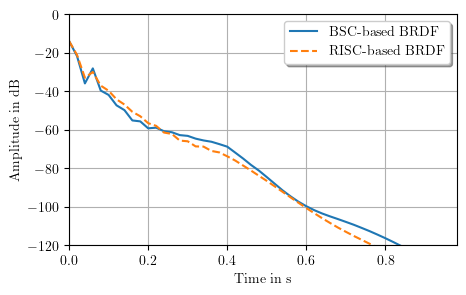

In [40]:
# change this variable to check different frequency bands
freq_bin = 2000
##

i = np.argmin(np.abs(np.array([125, 250, 500, 1e3, 2e3, 4e3])-freq_bin))

f,a=create_fig(figtype="big")
pf.plot.time(etc_BSC[0,i], dB=True, log_prefix=10,
             label=["BSC-based BRDF"],
             linestyle="-")
pf.plot.time(etc_RISC[0,i], dB=True, log_prefix=10,
             label=["RISC-based BRDF"],
             linestyle="--")

plt.legend(fontsize=10,shadow=True)
plt.ylim([-120,0])

In [ ]:
%load_ext watermark
%watermark -v -m -iv